<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_5_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 5.2.2 Using ML-based anomaly detection methods

Ronald Fisher (1936), a British statistician and biologist, published the Iris data set as an example of linear discriminant analysis. The original data set consists of 150 observations of iris flowers from three different species (*Iris setosa*, *Iris virginica*, and *Iris versicolor*). Each observation includes four features (length and width of the sepals and petals) and the iris species.

The Iris data set is widely used for educational purposes in statistical classification techniques and pattern recognition methods, as it provides a fundamental example of a multivariate data set with quantitative attributes that can be used to demonstrate the principles of various ML algorithms.

Follow the demonstration to implement anomaly detection with k-means clustering based on the Iris data set. You’ll learn about the benefits of analysing unlabelled data and identifying and interpreting anomalies.

In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mute warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the Iris data set.
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
# Set variables.
X = iris.data
y = iris.target

# Focusing on sepal data (first two columns of X).
X = X[:, :2]

In [ ]:
# Convert to DataFrame for easier manipulation.
df = pd.DataFrame(X, columns=['Sepal length', 'Sepal width'])

# View output.
df

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# Import KMeans function.
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [ ]:
# Set the Number of clusters
n_clusters = 3

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)

# Find the centroids
centroids = kmeans.cluster_centers_

In [ ]:
# Calculate the Euclidean distances for each point to its cluster centroid
distances = pairwise_distances(df, kmeans.cluster_centers_[kmeans.labels_], metric='euclidean')

In [ ]:
# Assign clusters back to the original DataFrame
df['Cluster'] = kmeans.labels_

# Assign Euclidean distances back to the original DataFrame
df['euclidean_distance'] = distances.diagonal()

# Now 'df' has two new columns: 'cluster' and 'euclidean_distance'
print(df.head(100))

    Sepal length  Sepal width  Cluster  euclidean_distance
0            5.1          3.5        1            0.118406
1            4.9          3.0        1            0.440931
2            4.7          3.2        1            0.381602
3            4.6          3.1        1            0.521939
4            5.0          3.6        1            0.172105
..           ...          ...      ...                 ...
95           5.7          3.0        0            0.316228
96           5.7          2.9        0            0.220206
97           6.2          2.9        0            0.474242
98           5.1          2.5        0            0.700539
99           5.7          2.8        0            0.130312

[100 rows x 4 columns]


In [ ]:
# Calculate the mean and standard deviation of Euclidean distances for each cluster
cluster_stats = df.groupby('Cluster')['euclidean_distance'].agg(['mean', 'std'])

print("Mean and Std Deviation by Cluster:")
print(cluster_stats)

# Set the threshold - how many std. dev's from the mean
threshold = 2

# Function to determine if a point is an outlier
def is_outlier(row):
    mean = cluster_stats.loc[row['Cluster'], 'mean']
    std = cluster_stats.loc[row['Cluster'], 'std']
    return abs(row['euclidean_distance'] - mean) > threshold * std

# Apply the function to each row in the DataFrame. Mark each datapoint as an outlier or not
df['Anomaly'] = df.apply(is_outlier, axis=1)

Mean and Std Deviation by Cluster:
             mean       std
Cluster                    
0        0.397772  0.236733
1        0.428146  0.284410
2        0.431380  0.290260


In [ ]:
print(df.head())

   Sepal length  Sepal width  Cluster  euclidean_distance  Anomaly
0           5.1          3.5        1            0.118406    False
1           4.9          3.0        1            0.440931    False
2           4.7          3.2        1            0.381602    False
3           4.6          3.1        1            0.521939    False
4           5.0          3.6        1            0.172105    False


In [ ]:
# Filter out anomalies
anomalies = df[df['Anomaly'] == 1]

# View output.
print("The threshold is ", threshold)
print("    ")
print("Identified anomalies:")
print(anomalies.shape)
anomalies

The threshold is  2
    
Identified anomalies:
(7, 5)


,Sepal length,Sepal width,Cluster,euclidean_distance,Anomaly
15,5.7,4.4,1,1.194328,True
41,4.5,2.3,1,1.236293,True
57,4.9,2.4,0,0.921238,True
60,5.0,2.0,0,1.038231,True
106,4.9,2.5,0,0.894533,True
117,7.7,3.8,2,1.146116,True
131,7.9,3.8,2,1.307086,True


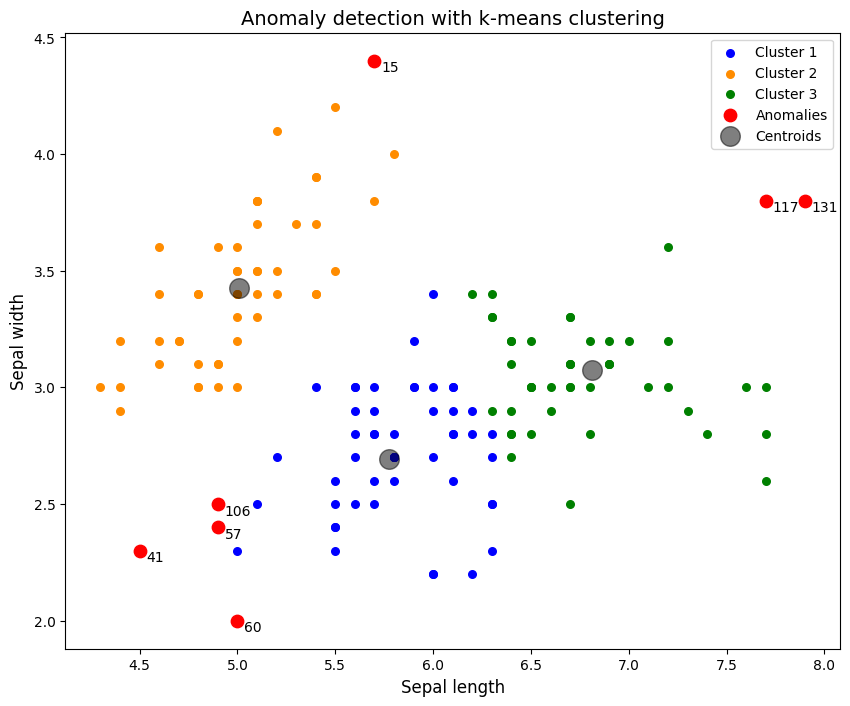

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the clusters and potential anomalies.
plt.figure(figsize=(10, 8))

# Create a scatterplot.
plt.scatter(X[df.Cluster == 0, 0], X[df.Cluster == 0, 1],
            s=30, c='blue', label ='Cluster 1')
plt.scatter(X[df.Cluster == 1, 0], X[df.Cluster == 1, 1],
            s=30, c='darkorange', label ='Cluster 2')
plt.scatter(X[df.Cluster == 2, 0], X[df.Cluster == 2, 1],
            s=30, c='green', label ='Cluster 3')
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1],
            c='red', s=80, label='Anomalies')
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='black', s=200, alpha=0.5,
            label='Centroids')

# Add labels for anomalies.
for index, row in anomalies.iterrows():
    plt.annotate(index, (row['Sepal length'],
                         row['Sepal width']),
                  textcoords="offset points",
                  xytext=(5, -5), ha='left', va='center')

# Add title, labels, and legend.
plt.title('Anomaly detection with k-means clustering',
          fontsize=14)
plt.xlabel('Sepal length', fontsize=12)
plt.ylabel('Sepal width', fontsize=12)
plt.legend(fontsize=10)

# View the plot.
plt.show()
plt.tight_layout()

# Key information
This demonstration illustrated the importance of identifying and interpreting anomalies. You explored how to apply k-means clustering as an unsupervised ML algorith for anomaly detection.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.